This file is intended to explore the dataset’s logic and visualizations.
If you want to reproduce the results, simply replace the path train_timeseries/train_timeseries.csv with the path to your own dataset.

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import math
import numpy as np
from pathlib import Path

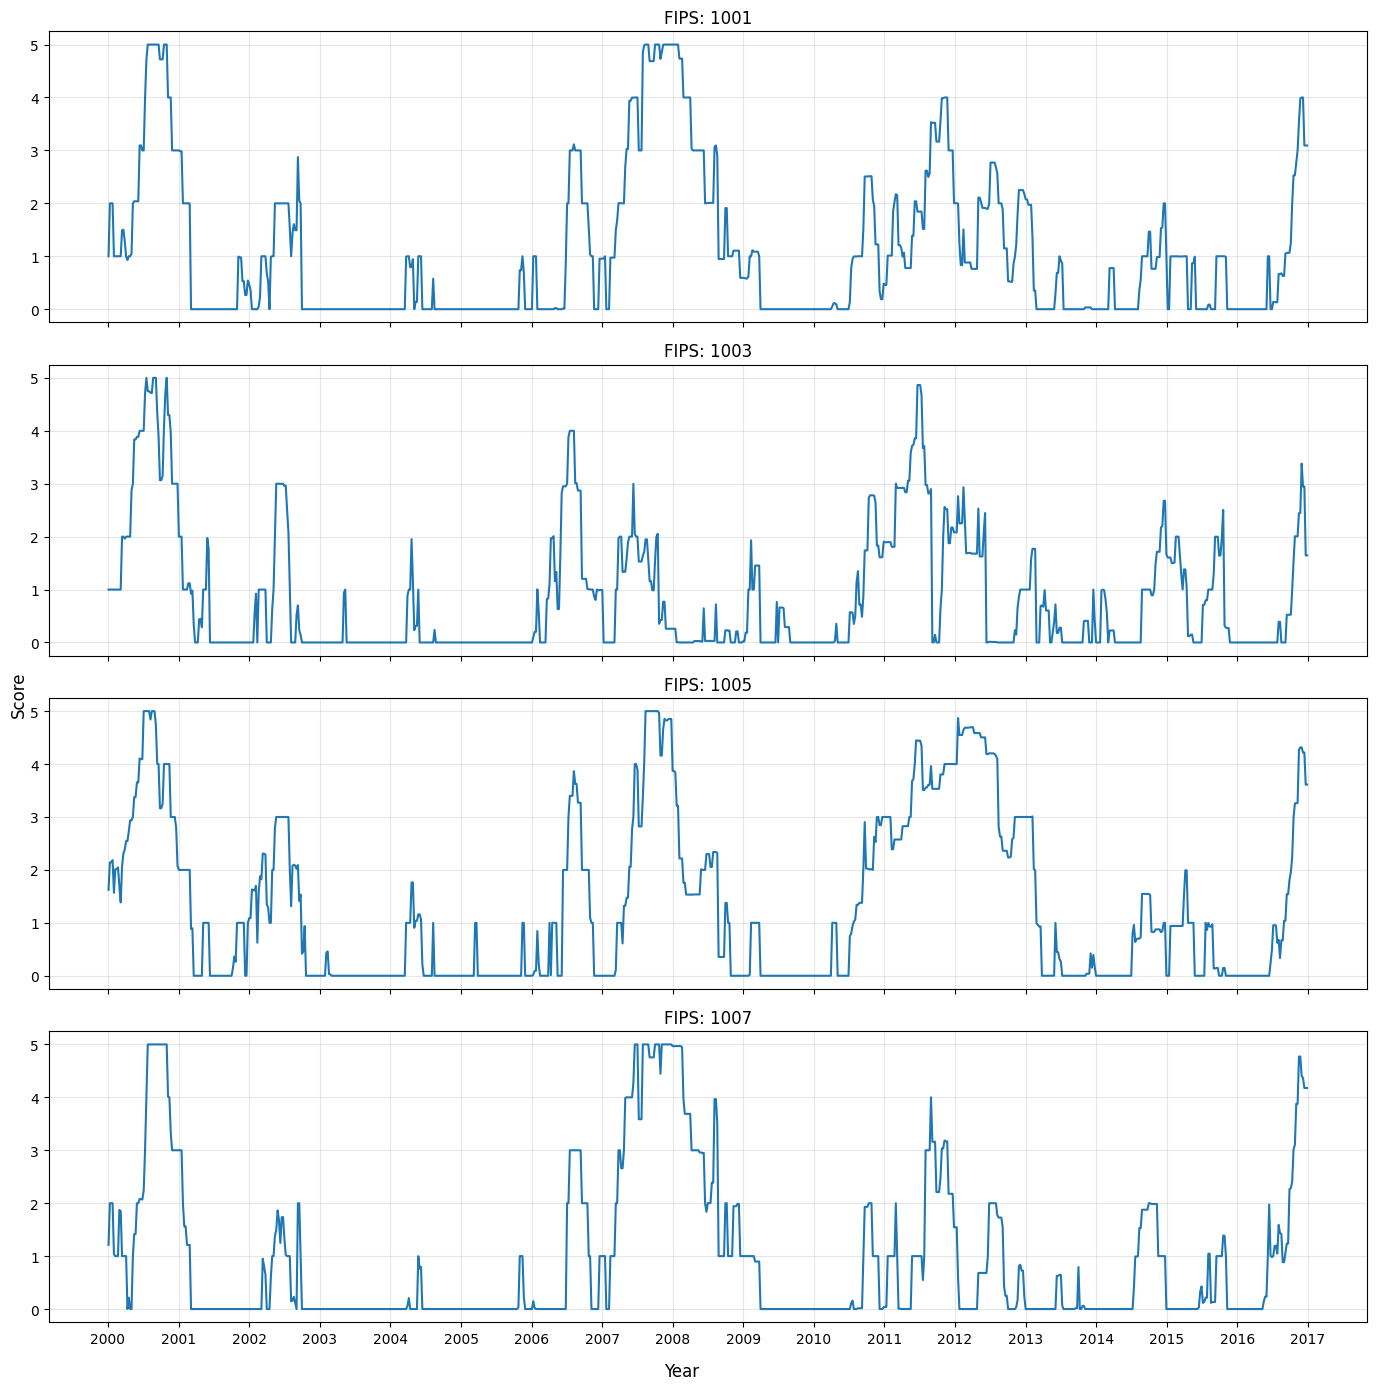

In [ ]:
df = (
    pd.read_csv(Path("train_timeseries") / "train_timeseries.csv",
                parse_dates=["date"])
      .dropna(subset=["score"])
      .sort_values(["fips", "date"])
)

selected_fips = df["fips"].drop_duplicates().iloc[:4]

rows = len(selected_fips)
fig, axes = plt.subplots(rows, 1, figsize=(14, 3.5 * rows), sharex=True)

axes = axes if isinstance(axes, (list, np.ndarray)) else [axes]

for ax, fips in zip(axes, selected_fips):
    grp = df[df["fips"] == fips]
    ax.plot(grp["date"], grp["score"])
    ax.set_title(f"FIPS: {fips}", fontsize=12)

    # Yearly ticks for clarity
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
    ax.grid(alpha=0.3)

fig.supylabel("Score")
fig.supxlabel("Year")
fig.tight_layout()
plt.show()

In [ ]:
avg_score = (
    df.groupby("fips", as_index=True)["score"]
      .mean()
      .sort_values(ascending=False)
)

top_5    = avg_score.head(5)
bottom_5 = avg_score.tail(5)

print("Top 5 highest‑average‑score FIPS areas")
display(top_5.to_frame("avg_score"))

print("\nTop 5 lowest‑average‑score FIPS areas")
display(bottom_5.to_frame("avg_score"))


Top 5 highest‑average‑score FIPS areas


,avg_score
fips,
32001,2.433521
32027,2.421126
32031,2.250204
32029,2.215673
32019,2.208064



Top 5 lowest‑average‑score FIPS areas


,avg_score
fips,
36023,0.144355
36007,0.136731
36053,0.124738
36077,0.102989
36017,0.100410


fips code start with 32 is Nevada state, fips code start with 36 is New York

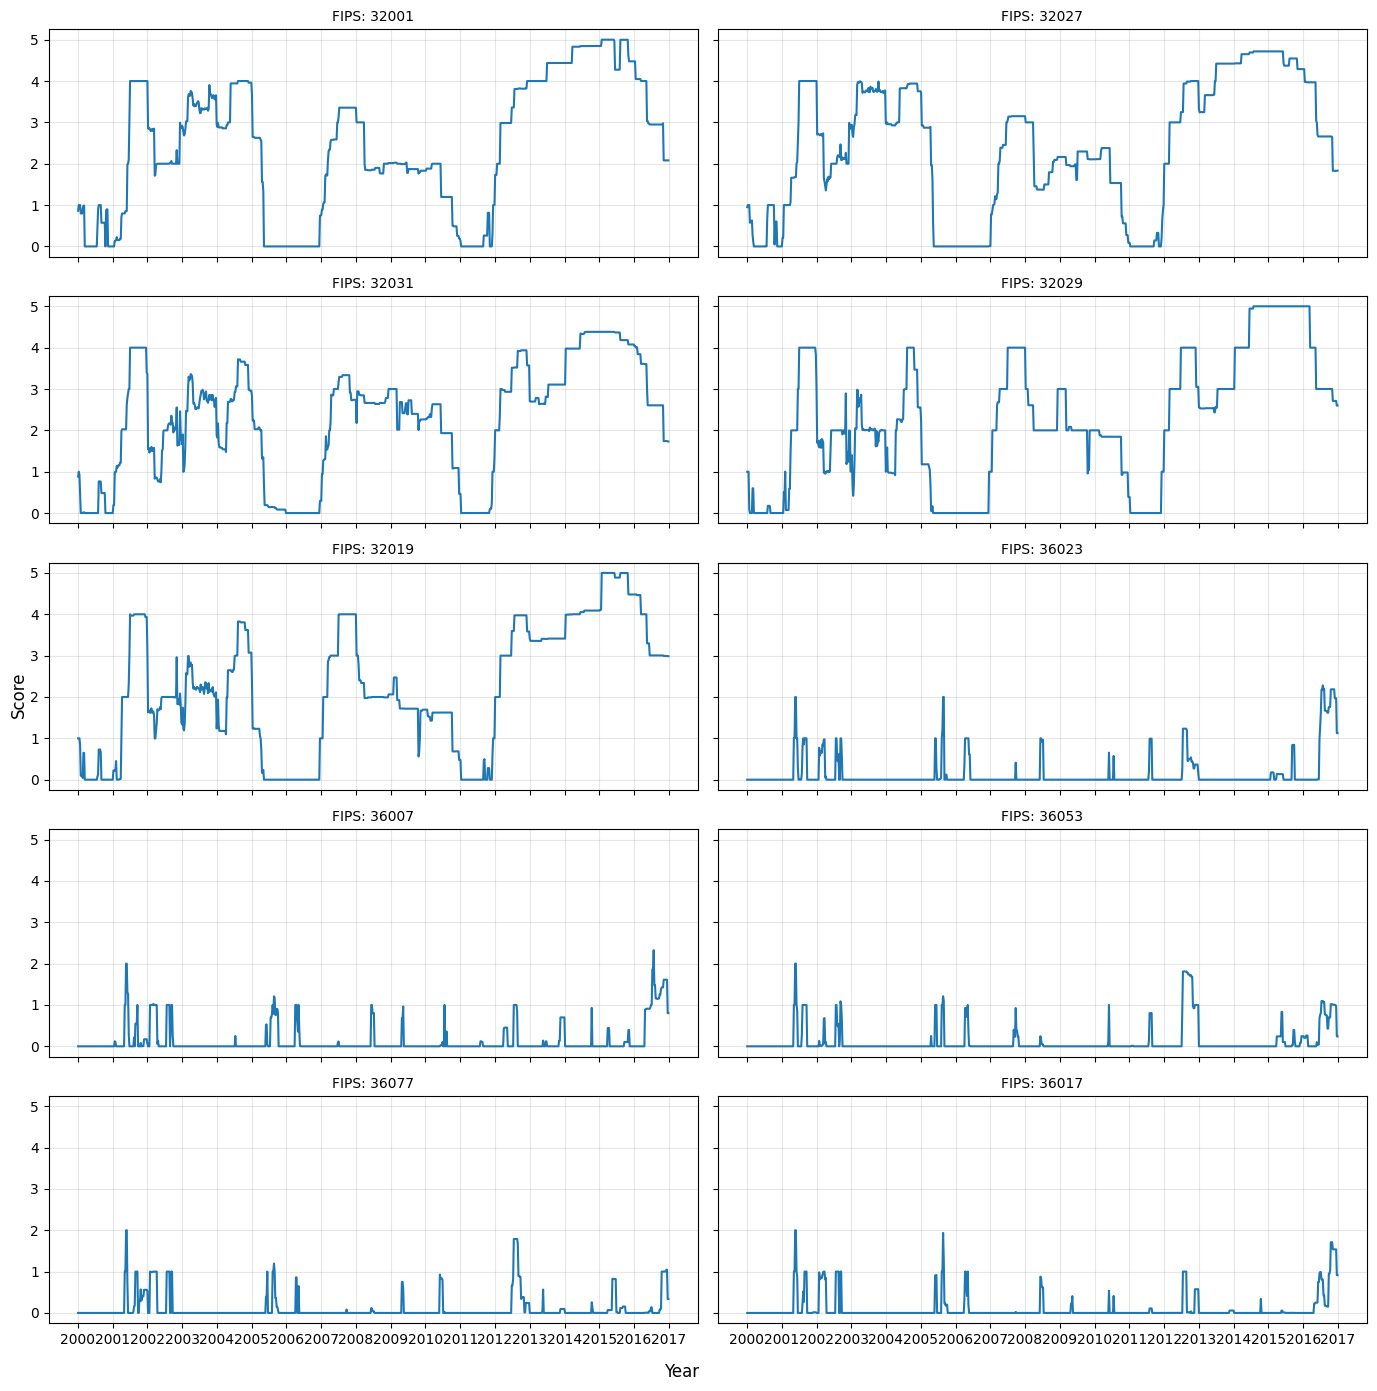

In [ ]:
data_path = Path("train_timeseries") / "train_timeseries.csv"
df = (
    pd.read_csv(data_path, parse_dates=["date"])
      .dropna(subset=["score"])
      .sort_values(["fips", "date"])
)

# Ten FIPS codes to visualize
fips_list = [32001, 32027, 32031, 32029, 32019,   # highest‑average
             36023, 36007, 36053, 36077, 36017]   # lowest‑average

cols, rows = 2, math.ceil(len(fips_list) / 2)  # 2 columns, 5 rows
fig, axes = plt.subplots(rows, cols,
                         figsize=(7 * cols, 2.8 * rows),
                         sharex=True, sharey=True)

axes = axes.flatten()  # easy indexing

for ax, fips in zip(axes, fips_list):
    grp = df[df["fips"] == fips]
    ax.plot(grp["date"], grp["score"])
    ax.set_title(f"FIPS: {fips}", fontsize=10)
    
    # Nice yearly ticks
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
    ax.grid(alpha=0.3)

for j in range(len(fips_list), len(axes)):
    axes[j].set_visible(False)

fig.supxlabel("Year")
fig.supylabel("Score")
fig.tight_layout()
plt.show()
